# Satellite Surface Radiation Budget intercomparison for climate change monitoring

Production date: 29-06-2023

Produced by: CNR-ISMAR

## 🌍 Use case: Use surface radiation budget to monitor climate change

## ❓ Quality assessment question(s)
* **What is the climatology and temporal variability of SRB and its uncertainty? How consistent are the surface radiation budget products?**

The Surface Radiation Budget (SRB) products allow quantifying the surface energy budget, the energy exchanges at the atmospheric lower boundary (with ocean, ice, and land), and their temporal and spatial variability, for use in several climate applications, such as, for instance: i) climate modeling and validation, where SRB data are essential for initializing and validating general circulation models (GCMs) of the ocean and atmosphere. Accurate SRB measurements help improve model predictions of climate tendencies by ensuring that energy exchanges are correctly represented; ii) energy balance analysis, focusing on understanding the role of SRB on Earth's energy balance, which influences global temperatures and climate dynamics. Discrepancies in the SRB can indicate changes in climate forcings, such as increased greenhouse gases or variations in solar radiation, etc.; iii) surface temperature studies, where SRB data contribute to studying regional amplifications of climate variations; iv) research on other cycles, like for instance the hydrological cycle, for which SRB strongly influences the evaporation rate and, to a lesser extent, precipitation patterns. Their temporal coverage and spatial detail, however, vary significantly between the products. There exist offsets between the products, which tend to be significant near the polar regions for shortwave components, and at low latitudes for longwave fluxes. In particular, biases of opposite sign (negative for CLARA products, positive for ESA and C3S products) and documented within the Product Validation and Intercomparison Reports, amplify the cross-product differences.

## 📢 Quality assessment statement
```{admonition} These are the key outcomes of this assessment
:class: note
* The surface radiation budget (SRB) products capture the spatial and temporal variability of the radiative fluxes at the surface, for use in climate analyses, energy budget studies, and climate model assessment
* The SRB products have different temporal coverage and spatial resolution, namely their combined use is not straightforward and it is recommended for advanced users only, or within selected periods
* The consistency between the products concerning spatially averaged values is sufficient, although systematic offsets occur between the products
* Climatological maps and zonally averaged values indicate that the products suffer from poor consistency in some areas, e.g. longwave flux components (downwelling and outgoing) at low latitudes, and shortwave at high latitudes. 
```

Using satellite data to estimate the surface radiation budget - comprising shortwave and longwave radiation at the interfaces between atmosphere and ocean, atmosphere and land, and atmosphere and ice - is often discontinuous and poses significant challenges for climate monitoring and model verification. These estimates can be influenced by various atmospheric conditions and instrument limitations, making their use complex and recommended only for expert users ([[1]](https://doi.org/10.1016/j.agrformet.2006.02.001); [[2]](https://doi.org/10.1175/2008BAMS2634.1)). Partial temporal (and spatial, to a lesser extent) sampling of the datasets hampers their easy utilization.

```{figure} attachment:9cf476db-8cc4-4d03-91e4-b387b8eb64f8.png
Zonally averaged outgoing longwave radiation at the surface
```
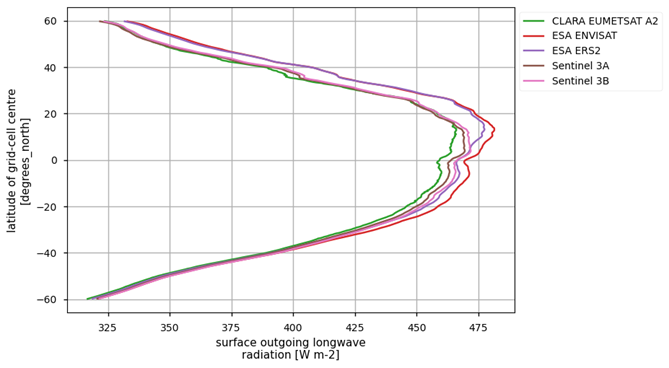

## 📋 Methodology

In this notebook we inter-compare the following catalogue entries from the Climate Data Store (CDS) by Copernicus:

1. CLARA-A2: CM SAF cLoud, Albedo and surface RAdiation dataset from AVHRR data - Edition 2. Satellite Application Facility on Climate Monitoring (CLARA EUMETSAT A2)
2. ESA Cloud Climate Change Initiative (ESA Cloud_cci) data: Cloud_cci ATSR2-AATSR L3C/L3U CLD_PRODUCTS v3.0.
3. Surface Radiation Budget, CCI ICDR product version 3.1. Copernicus Climate Change Service (C3S) Climate Data Store (CDS). (CLARA C3S)
4. CLARA-A2: CM SAF cLoud, Albedo and surface RAdiation dataset from AVHRR data - Edition 3. Satellite Application Facility on Climate Monitoring (CLARA EUMETSAT A3)

In particular, this analysis takes into account the Essential Climate Variables (ECV) as follows:

- Surface Reflected Solar Radiation (SRS);
- Surface Incoming Solar Radiation (SIS);
- Surface Downwelling Longwave Radiation (SDL);
- Surface Net Downward Shortwave Radiation (SNS);
- Surface Outgoing Longwave Radiation (SOL).

Please note than not all entries provide the above ECVs, although in some cases thay can be dedecued (e.g., by difference, if the net flux is provided). The analysis and results are organised in the following steps, which are detailed in the sections below:

**[](section-1)**

**[](section-2)**

**[](section-3)**

## 📈 Analysis and results

(section-1)=
### 1. Choose the data to use and setup code

In this section, we import the required packages and set up the dataset names for further use in the following sections. Processing functions are also defined. 

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from c3s_eqc_automatic_quality_control import diagnostics, download, plot, utils
import os
import seaborn as sns
os.environ["CDSAPI_RC"] = os.path.expanduser("~/detoma_vincenzo/.cdsapirc")
plt.style.use("seaborn-v0_8-notebook")

# Variables to analyse
variables = ("srs", "sis", "sdl", "sns", "sol")

collection_id = "satellite-surface-radiation-budget"
chunks = {"year": 1}
request_dict = {
    "CLARA C3S": {
        "start": "2016-01",
        "stop": "2017-12",
        "climate_data_record_type": "thematic_climate_data_record",
        "format": "zip",
        "origin": "c3s",
        "product_family": "clara_a2",
        "time_aggregation": "monthly_mean",
        "variable": [
            "surface_upwelling_shortwave_flux",
            "surface_net_downward_shortwave_flux",
            "surface_net_downward_radiative_flux",
            "surface_net_downward_longwave_flux",
        ],
        "version": "v2_0_1",
    },
    "CLARA EUMETSAT A3": {
        "start": "2014-01",
        "stop": "2017-12",
        "climate_data_record_type": "thematic_climate_data_record",
        "format": "zip",
        "origin": "eumetsat",
        "product_family": "clara_a3",
        "time_aggregation": "monthly_mean",
        "variable": [
            "surface_downwelling_shortwave_flux",
            "surface_downwelling_longwave_flux",
            "surface_upwelling_shortwave_flux",
            "surface_downwelling_shortwave_flux",
            "surface_net_downward_shortwave_flux",
            "surface_net_downward_longwave_flux",
        ],
        "version": "v2_0",
    },
    "CLARA EUMETSAT A2": {
        "start": "2014-01",
        "stop": "2017-12",
        "climate_data_record_type": "thematic_climate_data_record",
        "format": "zip",
        "origin": "eumetsat",
        "product_family": "clara_a2",
        "time_aggregation": "monthly_mean",
        "variable": [
            "surface_downwelling_longwave_flux",
            "surface_downwelling_shortwave_flux",
            "surface_upwelling_longwave_flux",
            "surface_upwelling_shortwave_flux",
            "surface_net_downward_longwave_flux",
        ],
        "version": "v2_0",
    },
    "ESA ENVISAT": {
        "start": "2007-01",
        "stop": "2010-12",
        "climate_data_record_type": "thematic_climate_data_record",
        "format": "zip",
        "origin": "esa",
        "product_family": "cci",
        "sensor_on_satellite": "aatsr_on_envisat",
        "time_aggregation": "monthly_mean",
        "variable": "all_variables",
    },
    "ESA ERS2": {
        "start": "2000-01",
        "stop": "2002-12",
        "climate_data_record_type": "thematic_climate_data_record",
        "format": "zip",
        "origin": "esa",
        "product_family": "cci",
        "sensor_on_satellite": "atsr2_on_ers2",
        "time_aggregation": "monthly_mean",
        "variable": "all_variables",
    },
    "Sentinel 3A": {
        "start": "2019-01",
        "stop": "2020-12",
        "climate_data_record_type": "interim_climate_data_record",
        "format": "zip",
        "origin": "c3s",
        "product_family": "cci",
        "sensor_on_satellite": "slstr_on_sentinel_3a",
        "time_aggregation": "monthly_mean",
        "variable": "all_variables",
    },
    "Sentinel 3B": {
        "start": "2019-01",
        "stop": "2020-12",
        "climate_data_record_type": "interim_climate_data_record",
        "format": "zip",
        "origin": "c3s",
        "product_family": "cci",
        "sensor_on_satellite": "slstr_on_sentinel_3b",
        "time_aggregation": "monthly_mean",
        "variable": "all_variables",
    },
}

# Functions to cache
def preprocess_time(ds):
    if "time" in ds and "units" in ds["time"].attrs:
        # Could not decode
        ds = ds.squeeze("time", drop=True)
    if "time" not in ds:
        time = pd.to_datetime(ds.attrs["time_coverage_start"])
        ds = ds.assign_coords(time=time)
    return ds


def spatial_weighted_mean(ds, lon_slice, lat_slice):
    ds = utils.regionalise(ds, lon_slice=lon_slice, lat_slice=lat_slice)
    return diagnostics.spatial_weighted_mean(ds, weights=True, skipna=False)

xarray_kwargs = {
    "drop_variables": [
        "time_bounds",
        "time_bnds",
        "lon_bnds",
        "lat_bnds",
        "record_status",
    ],
    "preprocess": preprocess_time,
}

(section-2)=
### 2. Download and Transform

The code below will download the products.

In [2]:
ds_maps = {}
ds_timeseries = {}
ds_nino3_4 = {}
p = []
for product, request in request_dict.items():
    print(f"{product}")
    start = request.pop("start")
    stop = request.pop("stop")
    requests = download.update_request_date(
        request, start=start, stop=stop, stringify_dates=True
    )
    p.append(product)

    # Maps
    ds = download.download_and_transform(
        collection_id,
        requests,
        #transform_func=diagnostics.time_weighted_mean,
        chunks=chunks,
        #transform_chunks=False,
        **xarray_kwargs,
    )
    ds.attrs.update({"start": start, "stop": stop})
    if product=='CLARA C3S':
        sis = (ds["SNS"] - ds['SRS']).rename('SIS')
        ds = ds.assign(sis=sis)
    elif product=='CLARA EUMETSAT A3':
        print('calculating srs for CLARA A3')
        srs = (ds["SIS"] - ds["SNS"]).rename('SRS')
        ds = ds.assign(srs=srs)

    ds = ds.assign_coords({'time':('time', np.array(pd.date_range(start, stop, freq='MS'), dtype=np.datetime64), ds.time.attrs)})
    ds_maps[product] = diagnostics.time_weighted_mean(ds, skipna=False).rename({var: var.lower() for var in ds.data_vars})

    # Timeseries
    #ds = download.download_and_transform(
    #    collection_id,
    #    requests,
    #    transform_func=spatial_weighted_mean,
    #    transform_func_kwargs={
    #        "lon_slice": slice(-180, 180),
    #        "lat_slice": slice(-60, 60),
    #    },
    #    chunks=chunks,
    #    **xarray_kwargs,
    #)
    #if product=='CLARA C3S':
    #    sis = (ds["SNS"] - ds["SRS"]).rename('SIS')
    #    ds = ds.assign(sis=sis)
    #elif product=='CLARA EUMETSAT A3':
    #    print('calculating srs for CLARA A3')
    #    srs = (ds["SIS"] - ds["SNS"]).rename('SRS')
    #    ds = ds.assign(srs=srs)
        
    ds_timeseries[product] = spatial_weighted_mean(ds, lon_slice=slice(-180, 180), lat_slice=slice(-30, 30)).rename({var: var.lower() for var in ds.data_vars})
    ds_nino3_4[product] = spatial_weighted_mean(ds, lon_slice=slice(-170, -120), lat_slice=slice(-5, 5)).rename({var: var.lower() for var in ds.data_vars})

CLARA C3S


100%|██████████| 2/2 [00:00<00:00,  4.88it/s]


CLARA EUMETSAT A3


100%|██████████| 4/4 [00:00<00:00, 20.70it/s]


calculating srs for CLARA A3
CLARA EUMETSAT A2


100%|██████████| 4/4 [00:00<00:00, 16.99it/s]


ESA ENVISAT


100%|██████████| 4/4 [00:00<00:00, 27.19it/s]


ESA ERS2


100%|██████████| 3/3 [00:00<00:00, 24.07it/s]


Sentinel 3A


100%|██████████| 2/2 [00:00<00:00, 44.29it/s]


Sentinel 3B


100%|██████████| 2/2 [00:00<00:00, 18.11it/s]


(section-3)=
### 3. Plot spatial weighted time series, time weighted means, spatial weighted zonal means

#### Plot spatial weighted time series
Below, we calculate and plot spatially weighted means for the different surface radiation budget products. Please note that masks of available data may differ across the products. However, the spatial weighted means are calculated between 60°S and 60°N, so that mask inconsistencies have minimal effects.

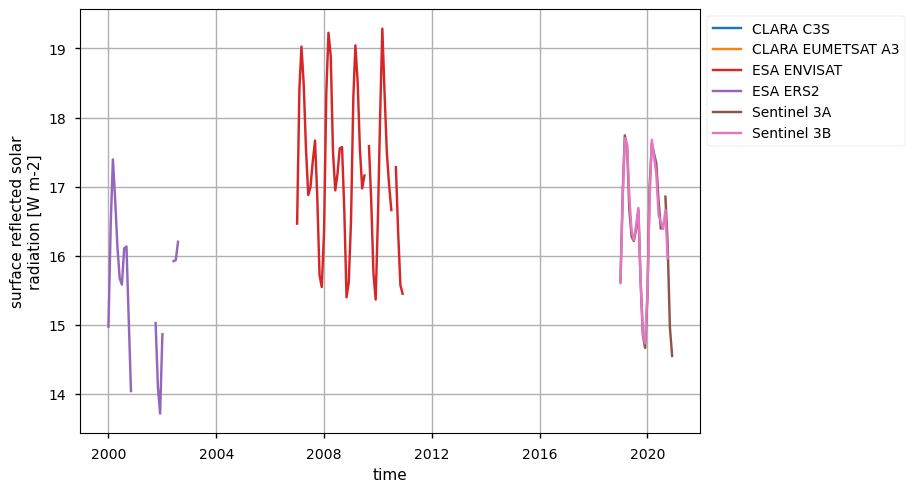

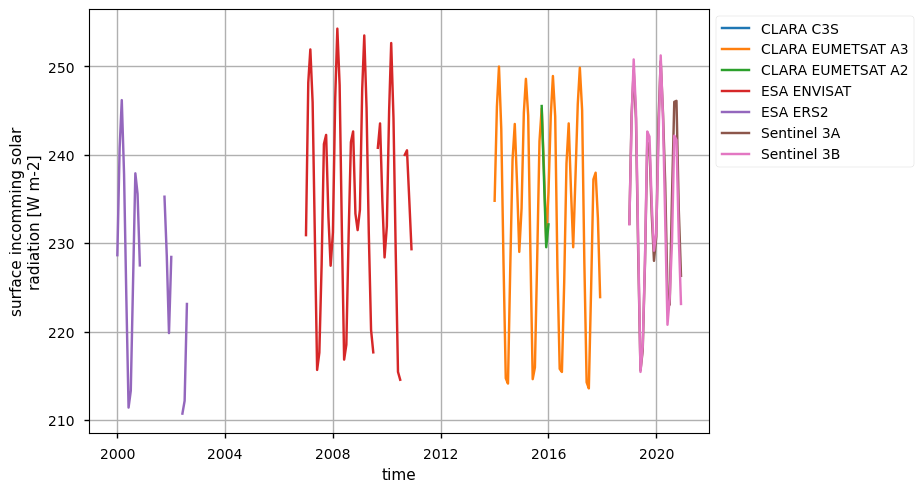

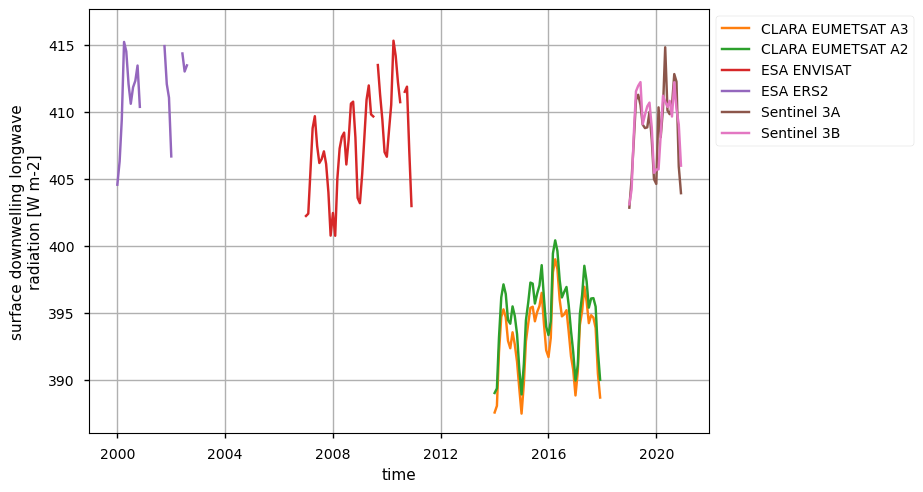

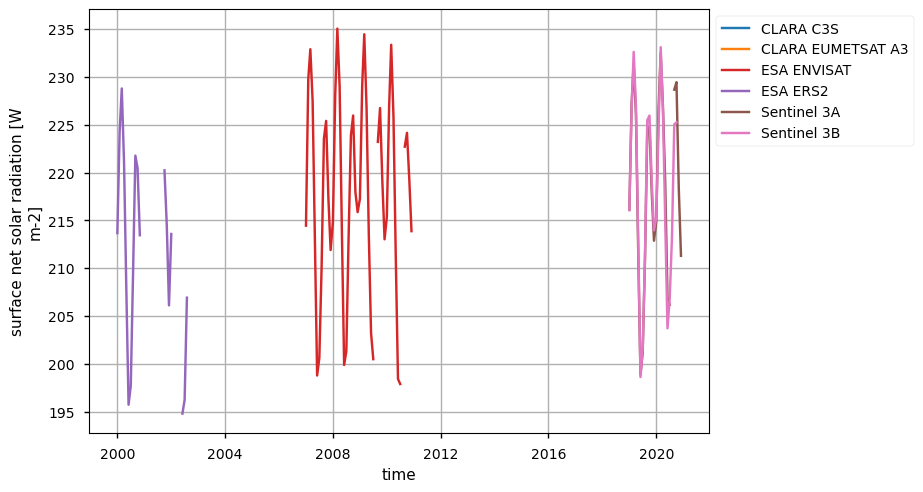

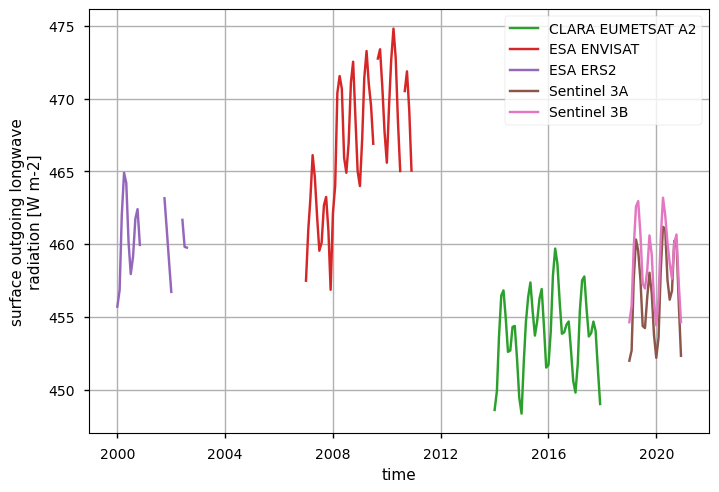

In [3]:
for var in variables:
    for i, (product, ds) in enumerate(ds_timeseries.items()):
        if var not in ds.data_vars:
            continue
        ds[var].plot(label=product, color=f"C{i}")
    plt.legend(bbox_to_anchor=(1, 1))
    plt.grid()
    plt.show()

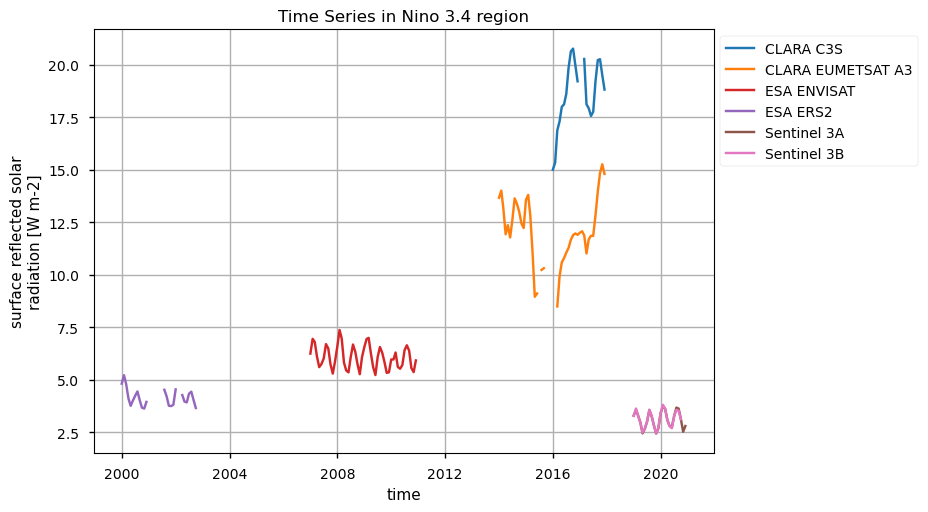

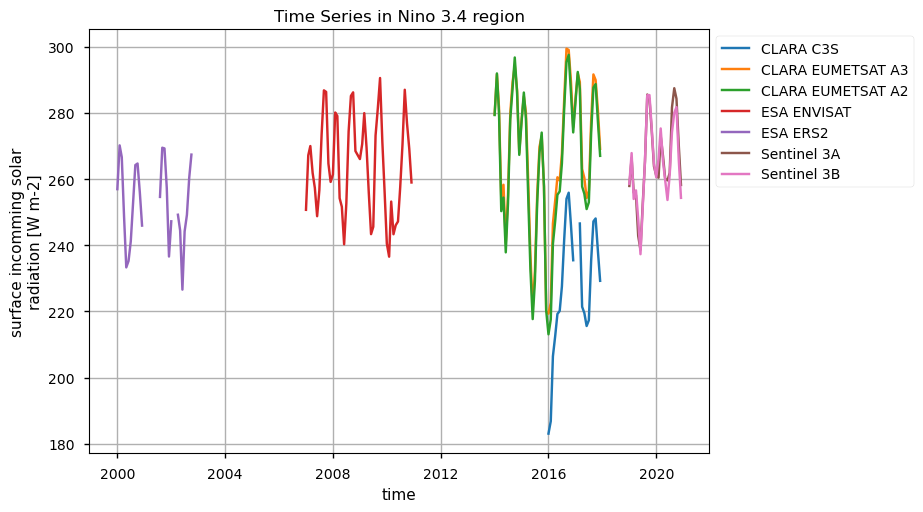

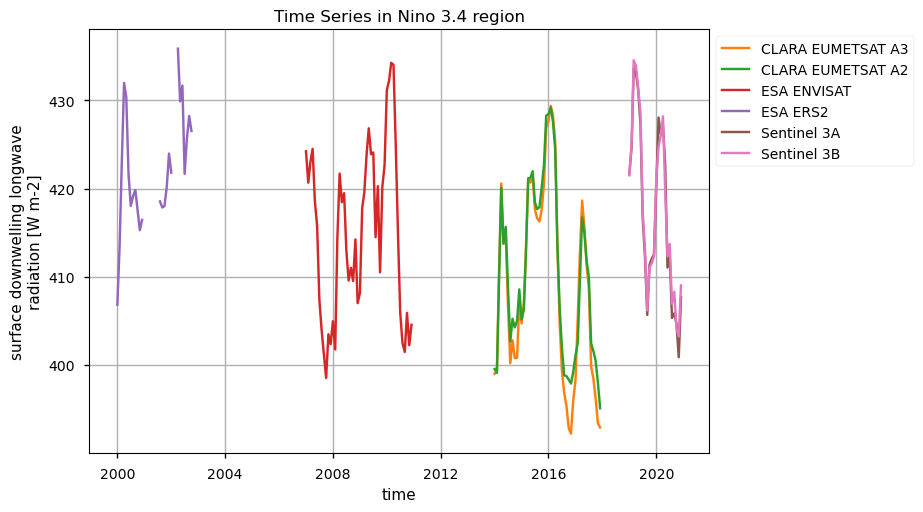

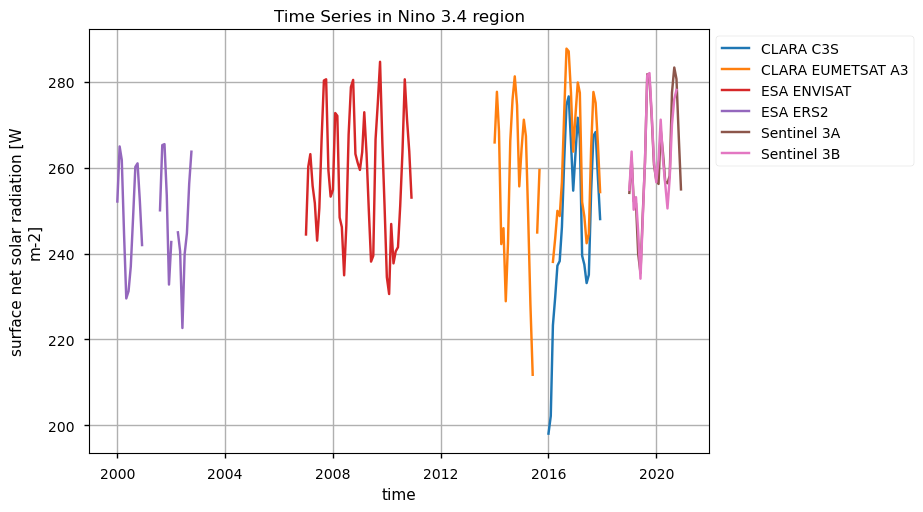

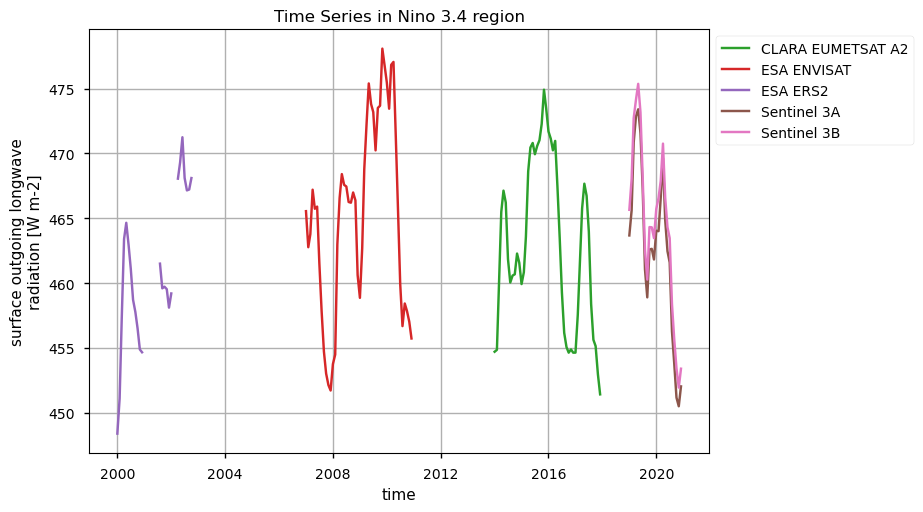

In [4]:
for var in variables:
    for i, (product, ds) in enumerate(ds_nino3_4.items()):
        if var not in ds.data_vars:
            continue
        ds[var].plot(label=product, color=f"C{i}")
    plt.title('Time Series in Nino 3.4 region')
    plt.legend(bbox_to_anchor=(1, 1))
    plt.grid()
    plt.show()

The timeseries above show that the different products do not overlap temporally, and thus they can be combined by expert users only. Moreover, there exist large offsets, likely linked to the different processing chains and sensors rather than to inter-annual variations, especially for the surface (outgoing and downwelling) longwave radiation.

The Nino3.4 region is specifically investigated. Therein, seasonal variations are less important than the inter-annual variations, which in turn respond to the El Nino-Southern Oscillation (ENSO) variability. Additionally, the region exhibits good observational covergae. Except the reflected solar radiation (see later for details), all variables show reasonable consistency, and changes across the different data periods are likely due to the interannual variations themsleves.

The seasonal means below indicate a good consistency for solar radiation products (both reflected and incoming) across the products. However, longwave radiation products have poorer consistency, with CLARA systematically exhibiting, on average, about 10 W m-2 less than the other products concerning the downwelling longwave radiation; it is known, indeed, from the Validation Report (CM SAF Cloud, Albedo, Radiation data record, AVHRR-based, Edition 3 (CLARA-A3) Surface Radiation, doi:10.5676/EUM_SAF_CM/CLARA_AVHRR/V003) that CLARA surface downwelling radiation suffers from a negative bias of about -6 W m-2 compared to station-based observations, while ESA products (both longwave and shortwave radiative fluxes) are known to be positvely biased (ESA Cloud_cci Product Validation and Intercomparison Report (PVIR), https://climate.esa.int/media/documents/Cloud_Product-Validation-and-Intercomparison-Report-PVIR_v6.0.pdf, and SRB CCI-ICDR: Product Quality Assurance Document (PQAD), https://confluence.ecmwf.int/pages/viewpage.action?pageId=304239428). Results on the outgoing longwave radiations show different distributions of the datasets, with CLARA and ESA Envisat exhibiting the smallest and the largest values, on average.

Text(0.5, 1.2, 'Monthly mean time series in the tropical domain (30°S - 30°N)')

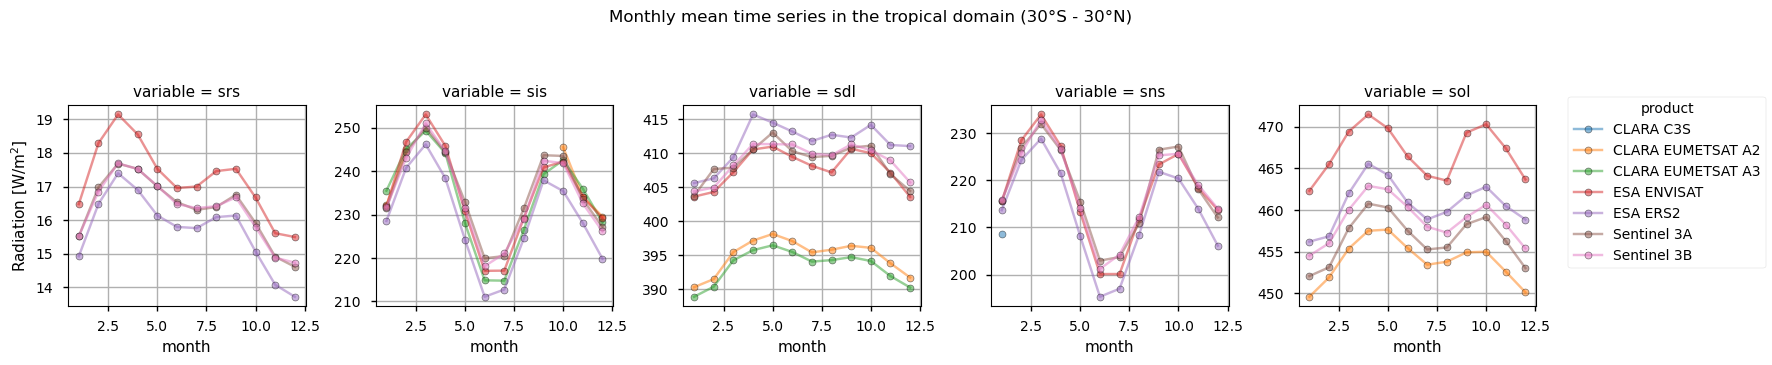

In [5]:
import xarray as xr
import datetime
ts = []
for var in variables:
    prodlist = []
    ts_var = []
    for i, (product, ds) in enumerate(ds_timeseries.items()):
        prodlist.append(product)
        if var not in ds.data_vars:
            prodlist.remove(product)
            continue
        if product=='ESA ERS2':
            tdrop = ds[var].time.sel(time=slice(datetime.datetime(2002,2,1),datetime.datetime(2002,2,28)))
            ds_var = ds[var].drop_sel(time=tdrop)
        else:
            ds_var = ds[var]
        ts_var.append(ds_var)
    ts_var = xr.concat([t for t in ts_var], dim='product').assign_coords({'product': prodlist})
    ts.append(ts_var)
ts = xr.concat([t.rename('') for t in ts], dim='variable').assign_coords({'variable': list(variables)})

t1 = ts.groupby('time.month').mean('time').plot(col='variable', sharey=False, hue='product', marker='o', markersize=5, markeredgecolor='k', markeredgewidth=0.5, alpha=0.5)
for ax in t1.axs.flatten():
    ax.grid()
for col in t1.axs[:, 0]:
    col.set_ylabel(r'Radiation [W/m$^2$]')
t1.fig.suptitle('Monthly mean time series in the tropical domain (30°S - 30°N)', y=1.2)

Text(0.5, 1.2, 'Monthly mean time series in Nino 3.4 region')

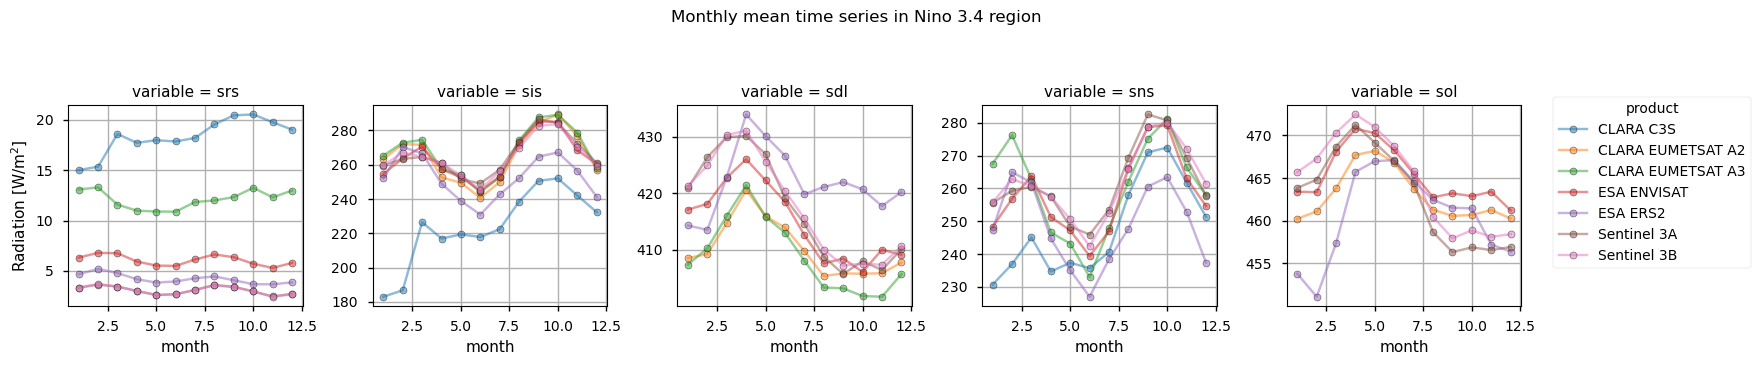

In [6]:
import xarray as xr
import datetime
ts = []
for var in variables:
    prodlist = []
    ts_var = []
    for i, (product, ds) in enumerate(ds_nino3_4.items()):
        prodlist.append(product)
        if var not in ds.data_vars:
            prodlist.remove(product)
            continue
        if product=='ESA ERS2':
            tdrop = ds[var].time.sel(time=slice(datetime.datetime(2002,2,1),datetime.datetime(2002,2,28)))
            ds_var = ds[var].drop_sel(time=tdrop)
        else:
            ds_var = ds[var]
        ts_var.append(ds_var)
    ts_var = xr.concat([t for t in ts_var], dim='product').assign_coords({'product': prodlist})
    ts.append(ts_var)
ts = xr.concat([t.rename('') for t in ts], dim='variable').assign_coords({'variable': list(variables)})

t1 = ts.groupby('time.month').mean('time').plot(col='variable', sharey=False, hue='product', marker='o', markersize=5, markeredgecolor='k', markeredgewidth=0.5, alpha=0.5)
for ax in t1.axs.flatten():
    ax.grid()
for col in t1.axs[:, 0]:
    col.set_ylabel(r'Radiation [W/m$^2$]')
t1.fig.suptitle('Monthly mean time series in Nino 3.4 region', y=1.2)

#### Plot time weighted means
Below, we calculate and plot time-weighted means for the different surface radiation budget products. Please note that periods differ across the products as illustrated in the previous section.

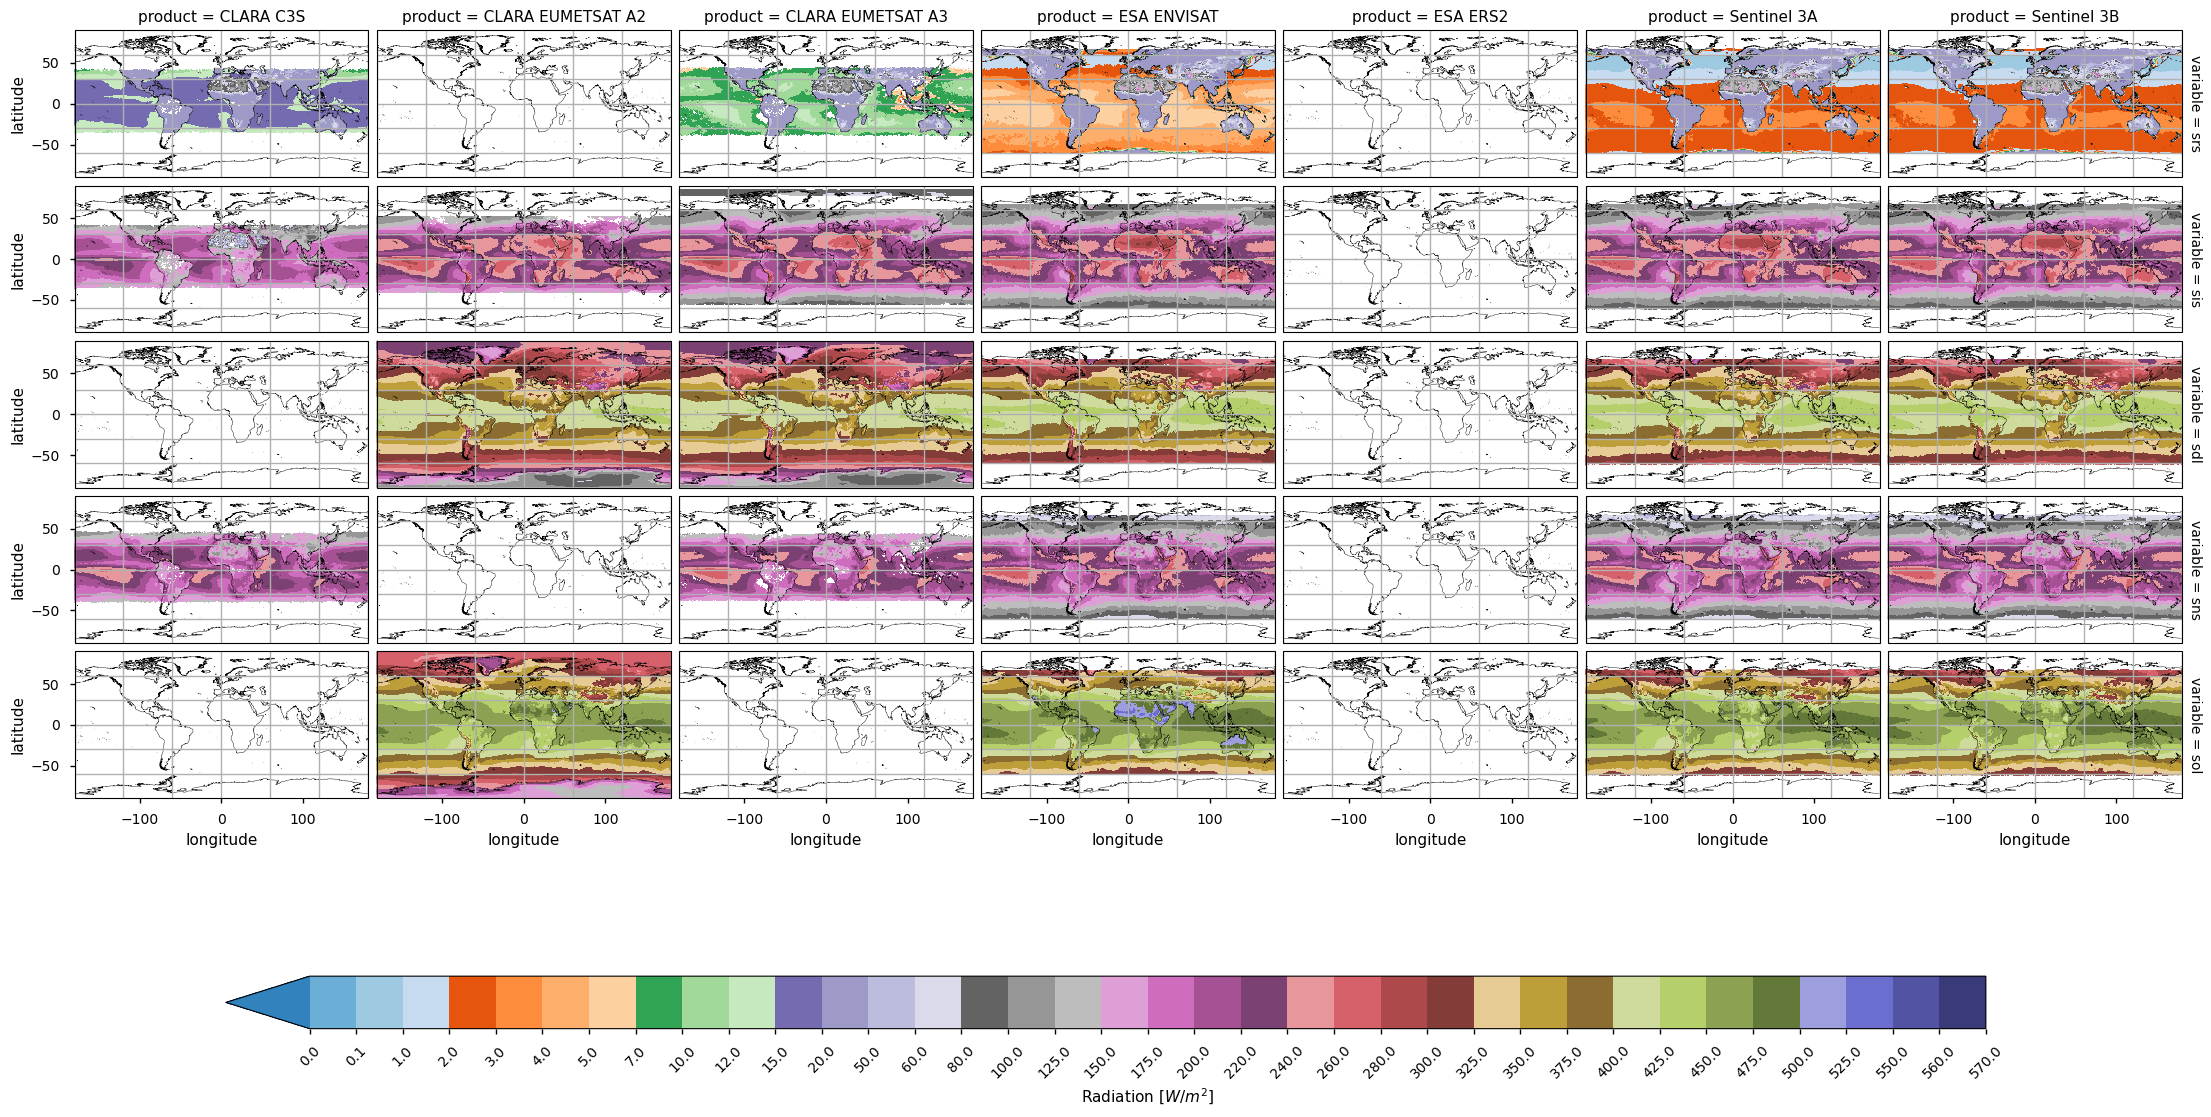

In [7]:
ms = []
for var in variables:
    m_var = []
    vmin = min([ds[var].min().values for ds in ds_maps.values() if var in ds.data_vars])
    vmax = max([ds[var].max().values for ds in ds_maps.values() if var in ds.data_vars])
    prodlist = []
    for product, ds in ds_maps.items():
        if var not in ds.data_vars:
            continue
        if len(ds[var].longitude)==1440:
            prodlist.append(product)
            m_var.append(ds[var].coarsen(latitude=4, longitude=4).mean().assign_coords({'latitude': np.linspace(-89.75, 89.75, 180), 'longitude': np.linspace(-179.85, 179.85, 360)}))
        elif len(ds[var].longitude)==720:
            prodlist.append(product)
            m_var.append(ds[var].coarsen(latitude=2, longitude=2).mean().assign_coords({'latitude': np.linspace(-89.75, 89.75, 180), 'longitude': np.linspace(-179.85, 179.85, 360)}))
        else:
            prodlist.append(product)
            m_var.append(ds[var])
    m_var = xr.concat([mv for mv in m_var], dim='product').assign_coords({'product': prodlist})
    ms.append(m_var)
ms = xr.concat([m for m in ms], dim='variable').assign_coords({'variable': list(variables)})

from matplotlib.colors import LinearSegmentedColormap

def create_custom_colormap(colormaps, n_colors=256):
    """
    Create a custom colormap by merging an arbitrary number of predefined colormaps.

    Parameters:
        colormaps (list of matplotlib colormaps): List of colormaps to merge.
        n_colors (int): Total number of colors in the resulting colormap.

    Returns:
        LinearSegmentedColormap: The custom merged colormap.
    """
    if not colormaps:
        raise ValueError("You must provide at least one colormap.")

    # Number of colors to sample from each colormap
    split = n_colors // len(colormaps)

    # Sample colors from each colormap and combine
    merged_colors = np.vstack([
        cmap(np.linspace(0, 1, split)) for cmap in colormaps
    ])

    # Handle rounding if n_colors is not evenly divisible
    extra_colors = n_colors - merged_colors.shape[0]
    if extra_colors > 0:
        last_cmap = colormaps[-1]
        merged_colors = np.vstack((merged_colors, last_cmap(np.linspace(0, 1, extra_colors))))

    # Create and return the custom colormap
    return LinearSegmentedColormap.from_list("CustomColormap", merged_colors)

colormaps = [plt.cm.tab20c, plt.cm.tab20b_r]
custom_cmap = create_custom_colormap(colormaps, n_colors=512)

levels_cbar =  [0, 0.1, 1, 2, 3, 4, 5, 7, 10, 12, 15, 20, 50, 60, 80, 100, 125, 150, 175, 200, 220, 240, 260, 280, 300, 325, 350, 375, 400, 425, 450, 475, 500, 525, 550, 560, 570]
p2 = ms.plot(col='product',
             row='variable', 
             subplot_kws={'projection': ccrs.PlateCarree()},
             levels= levels_cbar, #range(int(ms.min()), int(ms.max()), 5),
             extend=None,
             cmap=custom_cmap,
             add_colorbar=False,
             transform=ccrs.PlateCarree())
for ax in p2.axs.flat:  # loop through the map axes
    subplotspec = ax.get_subplotspec()
    if subplotspec.is_last_row():
        ax.xaxis.set_visible(True)
    if subplotspec.is_first_col():
        ax.yaxis.set_visible(True)
    ax.coastlines('50m')
    ax.gridlines()
p2.fig.set_layout_engine("compressed")
cax = p2.fig.add_axes([0.1, 0.1, 0.80, 0.035])
p2.add_colorbar(cax=cax, orientation='horizontal', fraction=0.05, pad=0.0001, anchor=(0.85,0.50), label=r'Radiation [$W/m^2$]')
cbar = p2.cbar
cbar.set_ticks(levels_cbar)
cbar.ax.set_xticklabels(cbar.ax.get_xticklabels(), rotation=45)
cbar.cmap.set_over('k')
cbar.cmap.set_under('w')

Maps exhibit generally similar features. The incoming shortwave radiation peaks at low latitudes; variations in its reflected counterpart depend on albedo values, which are very low in the open ocean and then increase for land, and snow and it is the highest over desertic regions. Values of reflected shortwave radiation over the open ocean seem too low in ESA and C3S products (less than 8 W m-2), while CLARA values (13-16 W m-2) are more aligned to the open ocean albedo of 0.06.
The downwelling longwave radiation is also distributed geographically depending on the incoming solar radiation and cloudiness, and thus also peaks in the Tropical band. In contrast, the outgoing downwelling radiations rely on the surface temperature, and thus peak again in the Tropics, with the lowest values on ice-covered regions. 
However, the different products are poorly consistent in many areas. In CLARA, for instance, the reflected shortwave is smaller over desertic regions and larger over oceans, while the incoming shortwave is on average smaller in the Tropical band. Downwelling longwave components are in good agreement, except for local differences (e.g., ESA ERS-2 over the Indian sub-continent). Differences in the outgoing longwave radiation are large over land, and mountainous areas in particular.

#### Plot spatial weighted zonal means
The code below will calculate and plot weighted zonal means for the surface radiation budget products. Please note that spatial and temporal sampling may differ across the products.

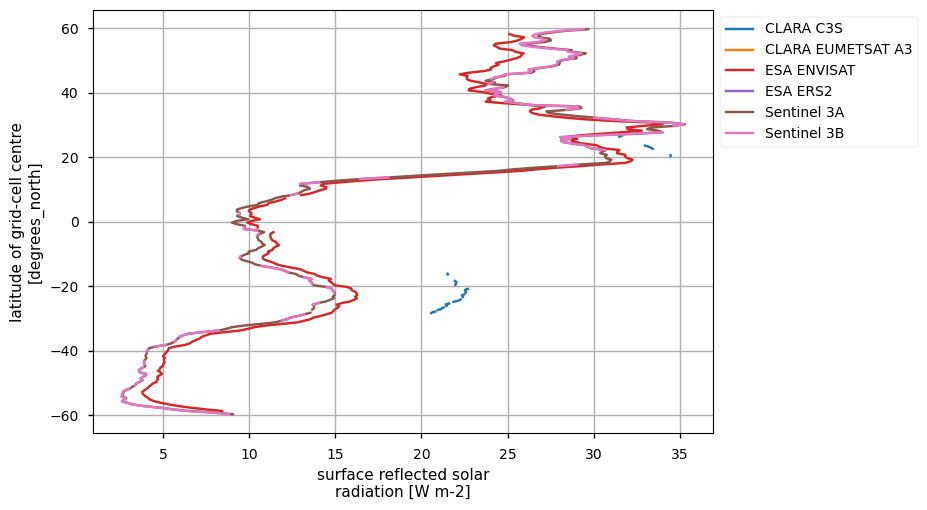

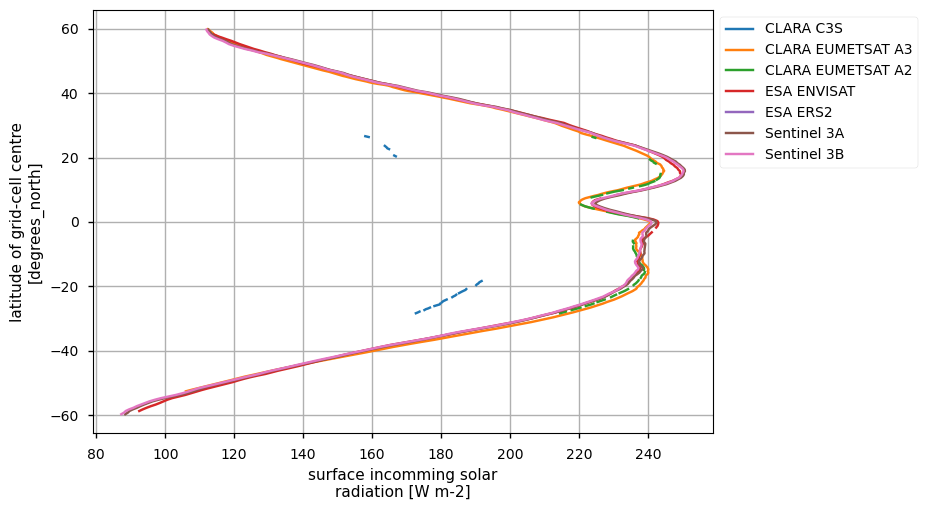

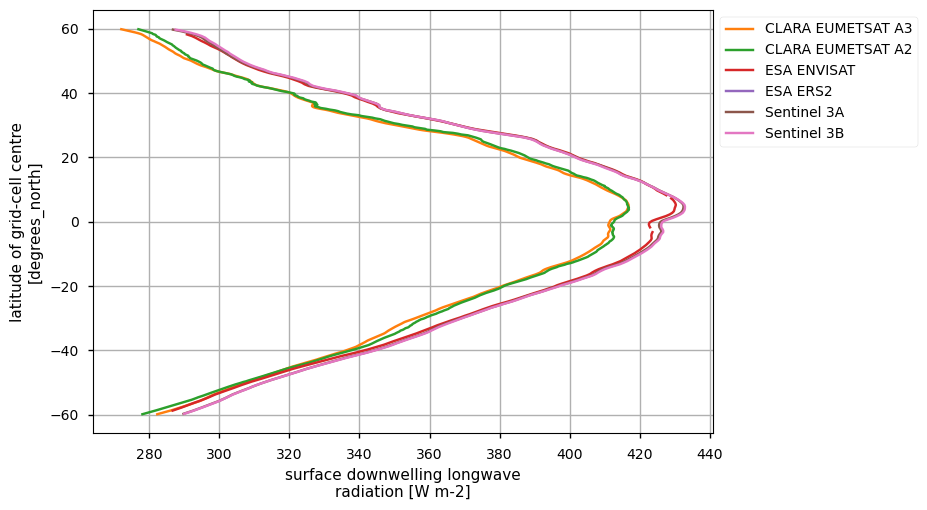

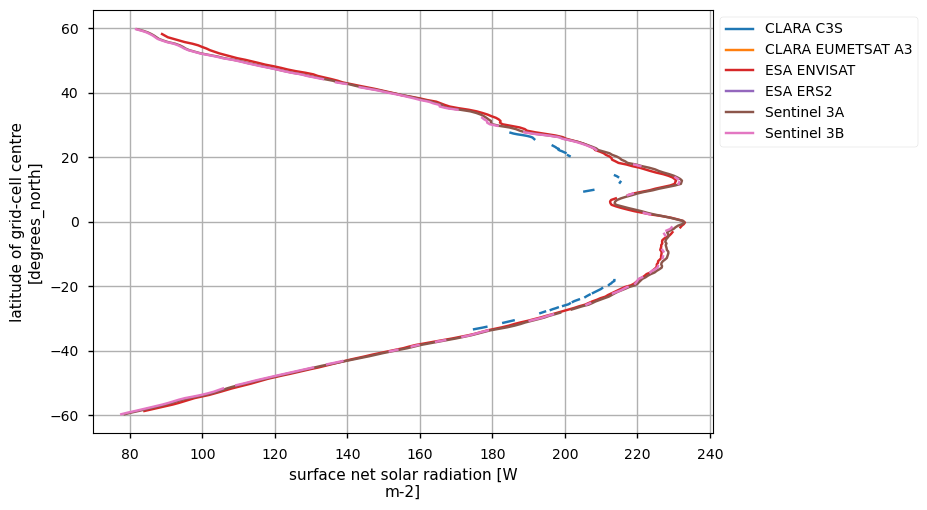

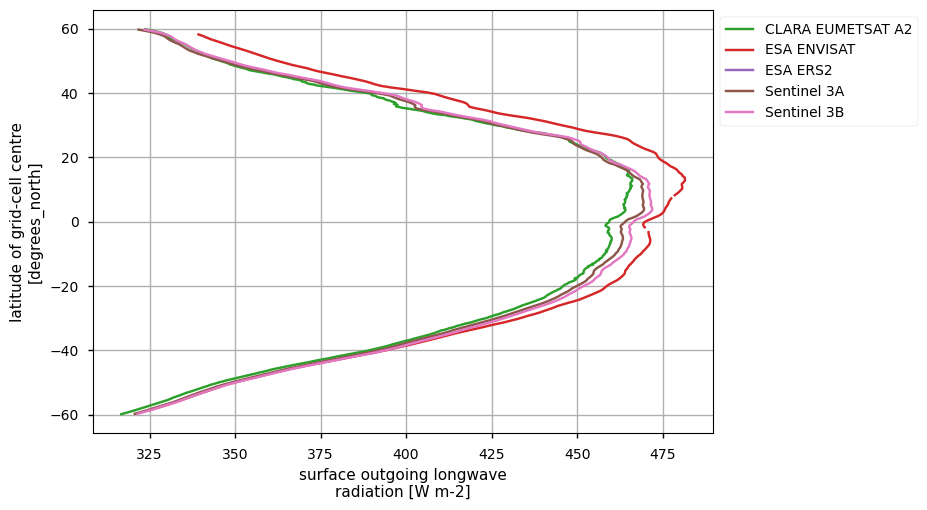

In [8]:
for var in variables:
    for i, (product, ds) in enumerate(ds_maps.items()):
        if var not in ds.data_vars:
            continue
        else:
            da = diagnostics.spatial_weighted_mean(ds[var].sel(latitude=slice(-60,60)), dim="longitude", skipna=False)
        da.plot(y="latitude", color=f"C{i}", label=product)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.grid()
    plt.show()

Zonal means exhibit generally similar features, although the different products are poorly consistent in several cases. Incoming shortwave data are inconsistent at high latitude also due to missing data therein during each hemispheric winter (which however may vary across different years), while downwelling longwave radiation datasets differ in the Tropical regions and in the Northern Hemisphere, in general.

### Discussion and applications

Evaluation of the surface radiation budget has large implications in climate studies and has been the subject of numerous investigations (e.g., [[8]](https://doi.org/10.5194/acp-5-2847-2005)). We briefly focus on two examples of application, respectively considering the ocean heat uptake and climate model simulation validation. 
The ocean heat uptake refers to the fact that due to the large heat capacity of seawater, most of the excess heat of the Earth's System is stored in the oceans. About 89% of energy is estimated to reside in the global ocean ([[9]](https://doi.org/10.5194/essd-15-1675-2023)); the surface heat budget is responsible for variations in net air-sea heat flux, i.e. the energy flux at the air-sea and ice-sea interface that regulates the temporal variations of the energy accumulated in the oceans. Ocean heat content tendency (or ocean heat uptake) is closely related to the surface radiation budget over the oceans, and any trend in the surface radiation budget will result in acceleration of the ocean warming. SRB observational products ([[5]](https://doi.org/10.3389/fmars.2019.00430)), eventually complemented with model reanalyses or simulations ([[7]](https://doi.org/10.1038/s41467-022-32540-5); [[4]](https://doi.org/10.1175/JCLI-D-21-0793.1)), all contribute to our monitoring and understanding of ocean heat uptake variations. Further to the SRB variables, strictly speaking, the ocean heat loss due to turbulent fluxes (latent and sensible heat fluxes) needs to be accounted for in estimating the net air-sea heat flux; reanalyses or some observation-only products contain such fluxes, which can be, however, affected by large uncertainties due to the strong non-linearity of the turbulent fluxes.
The second application involves validating climate model simulations in terms of surface radiation budget. For climate predictions and projections, it is important to have a reliable surface radiation budget so that the ocean-atmosphere energy exchanges are accurately simulated. Inaccuracies in the SRB will result, in turn, in biases and systematic errors in the lower atmosphere temperature (e.g., [[6]](https://doi.org/10.1002/2017JD027194)). The SRB products can be used to spot inaccuracies in the climate model simulations, for instance focusing on specific regions, such as polar regions ([[3]](https://doi.org/10.1002/2016JD025099)).

## ℹ️ If you want to know more

### Key resources

Code libraries used:
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [B-Open](https://www.bopen.eu/)

### References


[[1]](https://doi.org/10.1016/j.agrformet.2006.02.001) Yang, K., Koike, T., & Ye, B. (2006). Improving estimation of hourly, daily, and monthly solar radiation by importing global data sets. Agricultural and Forest Meteorology, 137(1-2), 43-55

[[2]](https://doi.org/10.1175/2008BAMS2634.1) Trenberth, K. E., Fasullo, J. T., & Kiehl, J. (2009). Earth's global energy budget. Bulletin of the American Meteorological Society, 90(3), 311-324

[[3]](https://doi.org/10.1002/2016JD025099) Boeke, R. C., and P. C. Taylor (2016), Evaluation of the Arctic surface radiation budget in CMIP5 models, J. Geophys. Res. Atmos., 121, 8525–8548, doi:10.1002/2016JD025099.

[[4]](https://doi.org/10.1175/JCLI-D-21-0793.1) Clément, L., E. L. McDonagh, J. M. Gregory, Q. Wu, A. Marzocchi, J. D. Zika, and A. J. G. Nurser, 2022: Mechanisms of Ocean Heat Uptake along and across Isopycnals. J. Climate, 35, 4885–4904, https://doi.org/10.1175/JCLI-D-21-0793.1.

[[5]](https://doi.org/10.3389/fmars.2019.00430) Cronin MF, Gentemann CL, Edson J, Ueki I, Bourassa M, Brown S, Clayson CA, Fairall CW, Farrar JT, Gille ST, Gulev S, Josey SA, Kato S, Katsumata M, Kent E, Krug M, Minnett PJ, Parfitt R, Pinker RT, Stackhouse PW Jr, Swart S, Tomita H, Vandemark D, Weller RA, Yoneyama K, Yu L and Zhang D (2019) Air-Sea Fluxes With a Focus on Heat and Momentum. Front. Mar. Sci. 6:430. doi:10.3389/fmars.2019.00430

[[6]](https://doi.org/10.1002/2017JD027194) Ma, H.-Y., Klein, S. A., Xie, S., Zhang, C., Tang, S., Tang, Q. et al (2018). CAUSES: On the role of surface energy budget errors to the warm surface air temperature error over the Central United States. Journal of Geophysical Research: Atmospheres, 123, 2888–2909. https://doi.org/10.1002/2017JD027194

[[7]](https://doi.org/10.1038/s41467-022-32540-5) Huguenin, M.F., Holmes, R.M. & England, M.H. Drivers and distribution of global ocean heat uptake over the last half century. Nat Commun 13, 4921 (2022). https://doi.org/10.1038/s41467-022-32540-5

[[8]](https://doi.org/10.5194/acp-5-2847-2005) Hatzianastassiou, N., Matsoukas, C., Fotiadi, A., Pavlakis, K. G., Drakakis, E., Hatzidimitriou, D., and Vardavas, I.: Global distribution of Earth's surface shortwave radiation budget, Atmos. Chem. Phys., 5, 2847–2867, https://doi.org/10.5194/acp-5-2847-2005, 2005.

[[9]](https://doi.org/10.5194/essd-15-1675-2023) von Schuckmann, et al.: Heat stored in the Earth system 1960–2020: where does the energy go?, Earth Syst. Sci. Data, 15, 1675–1709, https://doi.org/10.5194/essd-15-1675-2023, 2023.
